In [1]:
# Imports

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

## Data Preprocessing (Filtering words)

In [2]:
# Importing the dataset

df = pd.read_csv('Data/Dataset-1.csv')

print(df.shape)
print(df.columns)

(20972, 9)
Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')


In [3]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Keeping full stops for sentence tokenization
    text = re.sub(r'[^a-zA-Z\s.]', ' ', text)
    cleaned_text = re.sub(r'\s+', ' ', text).strip()

    sentences = sent_tokenize(cleaned_text)
    
    # Removing fullstops for sentence tokenization
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', cleaned_text)
    
    words = word_tokenize(cleaned_text)

    filtered_words = [word for word in words if word.lower() not in stop_words]
    stemmed_words = [ps.stem(word) for word in filtered_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

    return cleaned_text, sentences, filtered_words, stemmed_words, lemmatized_words

In [4]:
# Looping through the df, tokenizing the data in "TITLE", "ABSTRACT" columns and storing them in new columns

data_list = []

for i in range(0, df.shape[0]):
    title = df.loc[i, 'TITLE']
    abstract = df.loc[i, 'ABSTRACT']
    
    # title = title.split()
    # abstract = abstract.split()
    
    cleaned_text_title, sentences_title, filtered_words_title, stemmed_words_title, lemmatized_words_title = preprocess_text(title)
    cleaned_text_abstract, sentences_abstract, filtered_words_abstract, stemmed_words_abstract, lemmatized_words_abstract = preprocess_text(abstract)
    
    # print("Title: ", title)
    # print("Cleaned Text Title: ", cleaned_text_title)
    # print("Sentences Title: ", sentences_title)
    # print("Filtered Words Title: ", filtered_words_title)
    # print("Stemmed Words Title: ", stemmed_words_title)
    # print("Lemmatized Words Title: ", lemmatized_words_title)
    
    # print(type(cleaned_text_title))
    # print(type(filtered_words_title))
    # print(type(stemmed_words_title))
    # print(type(lemmatized_words_title))
    
    data_list.append({
        "Original Title": title,
        "Cleaned Title": cleaned_text_title,
        "Filtered Words Title": " ".join(filtered_words_title),
        "Stemmed Words Title": " ".join(stemmed_words_title),
        "Lemmatized Words Title": " ".join(lemmatized_words_title),
        "Original Abstract": abstract,
        "Cleaned Abstract": cleaned_text_abstract,
        "Filtered Words Abstract": " ".join(filtered_words_abstract),
        "Stemmed Words Abstract": " ".join(stemmed_words_abstract),
        "Lemmatized Words Abstract": " ".join(lemmatized_words_abstract),
    })
    
    

df_processed = pd.DataFrame(data_list)

df_processed = df_processed.dropna()

df_processed.reset_index(drop=True, inplace=True)

print(df_processed.shape)

df_processed.to_csv("processed_text.csv", index=False)


(20972, 10)


In [5]:
print(df_processed.head())
print(df_processed.columns)

print(df_processed.shape)

                                      Original Title  \
0        Reconstructing Subject-Specific Effect Maps   
1                 Rotation Invariance Neural Network   
2  Spherical polyharmonics and Poisson kernels fo...   
3  A finite element approximation for the stochas...   
4  Comparative study of Discrete Wavelet Transfor...   

                                       Cleaned Title  \
0        Reconstructing Subject Specific Effect Maps   
1                 Rotation Invariance Neural Network   
2  Spherical polyharmonics and Poisson kernels fo...   
3  A finite element approximation for the stochas...   
4  Comparative study of Discrete Wavelet Transfor...   

                                Filtered Words Title  \
0        Reconstructing Subject Specific Effect Maps   
1                 Rotation Invariance Neural Network   
2  Spherical polyharmonics Poisson kernels polyha...   
3  finite element approximation stochastic Maxwel...   
4  Comparative study Discrete Wavelet Transfor

## TF-IDF

In [2]:
df1 = pd.read_csv('Data/Dataset-1.csv')
df2 = pd.read_csv('processed_text.csv')

df = pd.concat([df1, df2], axis=1)
print(df.shape)

(20972, 19)


In [3]:
nan_rows = df[df.isna().any(axis=1)]

print(nan_rows)

df = df.dropna()

print(df.shape)

        ID    TITLE                                           ABSTRACT  \
8270  8271  D4M 3.0    The D4M tool is used by hundreds of research...   

      Computer Science  Physics  Mathematics  Statistics  \
8270                 1        0            0           0   

      Quantitative Biology  Quantitative Finance Original Title Cleaned Title  \
8270                     0                     0        D4M 3.0          D M    

     Filtered Words Title Stemmed Words Title Lemmatized Words Title  \
8270                  NaN                 NaN                    NaN   

                                      Original Abstract  \
8270    The D4M tool is used by hundreds of research...   

                                       Cleaned Abstract  \
8270  The D M tool is used by hundreds of researcher...   

                                Filtered Words Abstract  \
8270  tool used hundreds researchers perform complex...   

                                 Stemmed Words Abstract  \
8270  

In [4]:
Y = df[['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']]

print(Y.shape)
print(Y[:5][:])

(20971, 6)
   Computer Science  Physics  Mathematics  Statistics  Quantitative Biology  \
0                 1        0            0           0                     0   
1                 1        0            0           0                     0   
2                 0        0            1           0                     0   
3                 0        0            1           0                     0   
4                 1        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

df["PROCESSED_TEXT"] = df["Filtered Words Title"] + " " + df["Filtered Words Abstract"]

print(df["PROCESSED_TEXT"][0])

tfidf = TfidfVectorizer()

X_tfidf = tfidf.fit_transform(df["PROCESSED_TEXT"])

print(X_tfidf)

Reconstructing Subject Specific Effect Maps Predictive models allow subject specific inference analyzing disease related alterations neuroimaging data Given subject data inference made two levels global ie identifiying condition presence subject local ie detecting condition effect individual measurement extracted subject data global inference widely used local inference used form subject specific effect maps rarely used existing models often yield noisy detections composed dispersed isolated islands article propose reconstruction method named RSM improve subject specific detections predictive modeling approaches particular binary classifiers RSM specifically aims reduce noise due sampling error associated using finite sample examples train classifiers proposed method wrapper type algorithm used different binary classifiers diagnostic manner ie without information condition presence Reconstruction posed Maximum Posteriori problem prior model whose parameters estimated training data clas

In [6]:
# Save the tfidf transform using joblib
import joblib

joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [10]:
import torch
from torch.utils.data import DataLoader, TensorDataset, Subset

X_tfidf_tensor = torch.tensor(X_tfidf.toarray(), dtype=torch.float32)
Y_tensor = torch.tensor(Y.values, dtype=torch.long)

dataset = TensorDataset(X_tfidf_tensor, Y_tensor)

# Compute split indices
total_size = len(dataset)
train_size = int(0.5 * total_size)  # 50%
val_size = int(0.2 * total_size)    # 20%
test_size = total_size - train_size - val_size  # 30%

train_dataset = Subset(dataset, range(0, train_size))
val_dataset = Subset(dataset, range(train_size, train_size + val_size))
test_dataset = Subset(dataset, range(train_size + val_size, total_size))

print(len(train_dataset), len(val_dataset), len(test_dataset))

10485 4194 6292


In [2]:
import torch

torch.save({
    "train": train_dataset,
    "val": val_dataset,
    "test": test_dataset
}, "dataset.pth")

print("Datasets saved successfully!")


NameError: name 'train_dataset' is not defined

In [2]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split

loaded_data = torch.load("dataset.pth")
train_dataset = loaded_data["train"]
val_dataset = loaded_data["val"]
test_dataset = loaded_data["test"]

/tmp/ipykernel_5952/105726720.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_data = torch.load("dataset.pth")


In [3]:
batch_size = 32
train_loader_tfidf = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader_tfidf = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader_tfidf = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(len(train_loader_tfidf))
print(len(val_loader_tfidf))
print(len(test_loader_tfidf))

328
132
197


## Model 1

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define training function
def train_model(model, train_loader, val_loader, num_epochs=5, learning_rate=0.001):
    criterion = nn.BCELoss()  # Binary Cross Entropy for multi-label classification
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        total_train_loss = 0.0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.float())  # Ensure labels are float
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()
        total_val_loss = 0.0

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels.float())
                total_val_loss += loss.item()

        avg_val_loss = total_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

    return train_losses, val_losses

In [55]:

# simple Feedforward Neural Network
class MultiLabelNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultiLabelNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
        self.sigmoid = nn.Sigmoid()  # sigmoid activation for multilabel

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.sigmoid(x)
    
    
import torch.nn as nn

class MultiLabelNNdeep(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultiLabelNNdeep, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, num_classes)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)  # Prevents overfitting
        self.sigmoid = nn.Sigmoid()  # For multilabel classification

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc4(x)
        return self.sigmoid(x)


Epoch 1/20 - Train Loss: 0.3947, Val Loss: 0.2581
Epoch 2/20 - Train Loss: 0.2288, Val Loss: 0.2112
Epoch 3/20 - Train Loss: 0.1916, Val Loss: 0.1988
Epoch 4/20 - Train Loss: 0.1725, Val Loss: 0.1933
Epoch 5/20 - Train Loss: 0.1579, Val Loss: 0.1906
Epoch 6/20 - Train Loss: 0.1463, Val Loss: 0.1889
Epoch 7/20 - Train Loss: 0.1361, Val Loss: 0.1879
Epoch 8/20 - Train Loss: 0.1262, Val Loss: 0.1867
Epoch 9/20 - Train Loss: 0.1174, Val Loss: 0.1864
Epoch 10/20 - Train Loss: 0.1091, Val Loss: 0.1881
Epoch 11/20 - Train Loss: 0.1025, Val Loss: 0.1863
Epoch 12/20 - Train Loss: 0.0958, Val Loss: 0.1897
Epoch 13/20 - Train Loss: 0.0903, Val Loss: 0.1881
Epoch 14/20 - Train Loss: 0.0848, Val Loss: 0.1896
Epoch 15/20 - Train Loss: 0.0808, Val Loss: 0.1900
Epoch 16/20 - Train Loss: 0.0771, Val Loss: 0.1925
Epoch 17/20 - Train Loss: 0.0741, Val Loss: 0.1930
Epoch 18/20 - Train Loss: 0.0713, Val Loss: 0.1948
Epoch 19/20 - Train Loss: 0.0683, Val Loss: 0.1940
Epoch 20/20 - Train Loss: 0.0669, Val Lo

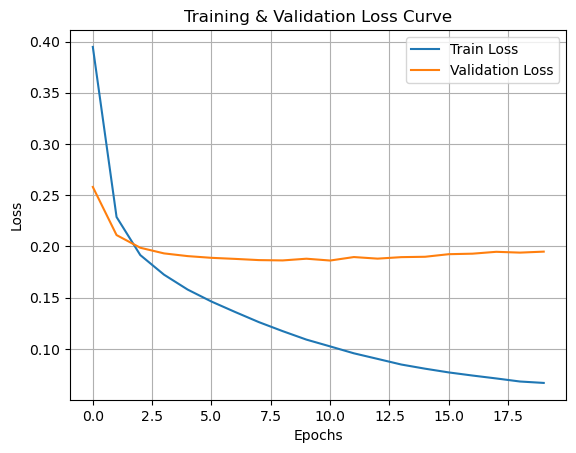

In [57]:
# Get input and output sizes
input_size = next(iter(train_loader_tfidf))[0].shape[1]  # Feature size
num_classes = next(iter(train_loader_tfidf))[1].shape[1]  # Number of labels

# Initialize the model
model = MultiLabelNN(input_size, num_classes)

# Train the model
train_losses, val_losses = train_model(model, train_loader_tfidf, val_loader_tfidf, num_epochs=20)

# Plot train vs validation loss
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.title("Training & Validation Loss Curve")
plt.show()

In [58]:
# Save the model
torch.save(model.state_dict(), "model.pth")

In [63]:
import torch
from sklearn.metrics import classification_report

# Load the model
model = MultiLabelNN(input_size, num_classes)
model.load_state_dict(torch.load("model.pth"))

def test_model(model, test_loader):
    model.eval()
    all_predictions = []
    all_labels = []
    
    correct=0
    total=0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            predictions = (outputs > 0.5).float()
            
            for i in range(len(predictions)):
                if predictions[i].sum() == 0:
                    max_index = torch.argmax(outputs[i])
                    predictions[i][max_index] = 1
            
            all_predictions.append(predictions.cpu())
            all_labels.append(labels.cpu())
            correct += (predictions == labels).sum().item()
            total += labels.numel()

    accuracy = correct / total
    print(f"Accuracy: {accuracy * 100:.2f}%")

    all_predictions = torch.cat(all_predictions, dim=0).numpy()
    all_labels = torch.cat(all_labels, dim=0).numpy()

    print(classification_report(all_labels, all_predictions, zero_division=0, target_names=['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']))
    
print("Testing the model on the Train set:")
test_model(model, train_loader_tfidf)

print("Testing the model on the val set:")
test_model(model, val_loader_tfidf)

print("Testing the model on the test set:")
test_model(model, test_loader_tfidf)

/tmp/ipykernel_6147/543267029.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model.pth"))


Testing the model on the Train set:
Accuracy: 99.59%
                      precision    recall  f1-score   support

    Computer Science       0.98      1.00      0.99      4273
             Physics       1.00      0.99      1.00      3020
         Mathematics       0.99      0.99      0.99      2812
          Statistics       0.99      1.00      0.99      2608
Quantitative Biology       0.99      0.92      0.95       309
Quantitative Finance       1.00      0.89      0.94       124

           micro avg       0.99      0.99      0.99     13146
           macro avg       0.99      0.96      0.98     13146
        weighted avg       0.99      0.99      0.99     13146
         samples avg       0.99      0.99      0.99     13146

Testing the model on the val set:
Accuracy: 92.30%
                      precision    recall  f1-score   support

    Computer Science       0.81      0.86      0.83      1713
             Physics       0.89      0.88      0.89      1193
         Mathematics    

In [60]:
tfidf = joblib.load('tfidf_vectorizer.pkl')

model.eval()

new_data = [ 
    "quantum physics and its applications", 
    "mathematics and statistics in data science", 
    "financial markets and stock prices", 
    "biology and genetics",
    "econometrics and financial modeling",
    "probability theory in finance modeling stocks using stochastic calculus",
    "maxwell equation and its applications in physics"
]

X_new = tfidf.transform(new_data)

X_new_tensor = torch.tensor(X_new.toarray(), 
dtype=torch.float32)

In [61]:
print(X_new_tensor.shape)

prediction = model(X_new_tensor)
print("Prediction for new data:", prediction)

torch.Size([7, 51009])
Prediction for new data: tensor([[0.0282, 0.9867, 0.0582, 0.0050, 0.0011, 0.0021],
        [0.4279, 0.2665, 0.1404, 0.5181, 0.0138, 0.0035],
        [0.0104, 0.0167, 0.3114, 0.0415, 0.0217, 0.8379],
        [0.0640, 0.0417, 0.1915, 0.0647, 0.2131, 0.0155],
        [0.0288, 0.0368, 0.2237, 0.1651, 0.0272, 0.1675],
        [0.1024, 0.0664, 0.0681, 0.0994, 0.0421, 0.1054],
        [0.0266, 0.5000, 0.7719, 0.0010, 0.0028, 0.0043]],
       grad_fn=<SigmoidBackward0>)


In [62]:
topics = ["Computer Science", "Physics", "Mathematics", "Statistics", "Quantitative Biology", "Quantitative Finance"]

for i, pred in enumerate(prediction):
    binary_pred = (pred > 0.3).int()
    
    active_topics = [topics[j] for j, val in enumerate(binary_pred) if val == 1]
    
    if not active_topics:
        max_index = torch.argmax(pred).item()
        active_topics = [topics[max_index]]
    
    print(f"{new_data[i]}: {active_topics}")

quantum physics and its applications: ['Physics']
mathematics and statistics in data science: ['Computer Science', 'Statistics']
financial markets and stock prices: ['Mathematics', 'Quantitative Finance']
biology and genetics: ['Quantitative Biology']
econometrics and financial modeling: ['Mathematics']
probability theory in finance modeling stocks using stochastic calculus: ['Quantitative Finance']
maxwell equation and its applications in physics: ['Physics', 'Mathematics']


## Model 2

In [4]:
import torch
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Function to extract data from a PyTorch DataLoader
def extract_data(loader):
    X, y = [], []
    for inputs, labels in loader:
        X.append(inputs.view(inputs.size(0), -1).numpy())  # Flatten input
        y.append(labels.numpy())
    return np.vstack(X), np.vstack(y)

# Extract data from the train, validation, and test loaders
X_train, y_train = extract_data(train_loader_tfidf)
X_val, y_val = extract_data(val_loader_tfidf)
X_test, y_test = extract_data(test_loader_tfidf)

In [5]:
# print the shapes
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

print(type(X_test))

(10485, 51009) (10485, 6)
(4194, 51009) (4194, 6)
(6292, 51009) (6292, 6)
<class 'numpy.ndarray'>


In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # k=5
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred, target_names=['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']))


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x719ede9fb560>
Traceback (most recent call last):
  File "/home/aviator98/anaconda3/envs/python3.11_env/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/aviator98/anaconda3/envs/python3.11_env/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aviator98/anaconda3/envs/python3.11_env/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/aviator98/anaconda3/envs/python3.11_env/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_co

                      precision    recall  f1-score   support

    Computer Science       0.78      0.79      0.79      2607
             Physics       0.91      0.74      0.82      1800
         Mathematics       0.77      0.71      0.74      1686
          Statistics       0.72      0.70      0.71      1593
Quantitative Biology       0.51      0.19      0.27       144
Quantitative Finance       0.73      0.42      0.54        78

           micro avg       0.79      0.73      0.76      7908
           macro avg       0.74      0.59      0.64      7908
        weighted avg       0.79      0.73      0.76      7908
         samples avg       0.77      0.76      0.75      7908



/home/aviator98/anaconda3/envs/python3.11_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
import joblib

tfidf = joblib.load('tfidf_vectorizer.pkl')

new_data = [ 
    "quantum physics and its applications", 
    "mathematics and statistics in data science", 
    "financial markets and stock prices",
    "fluid dynamics",
    "network security",
    "machine learning and deep learning",
    "population modeling in biology"
]

X_new = tfidf.transform(new_data).toarray()

print(X_new.shape)
print(type(X_new))

(7, 51009)
<class 'numpy.ndarray'>


In [39]:
y_new = knn.predict(X_new)

target_names = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']

predicted_classes = []

for pred in y_new:
    classes = [target_names[i] for i, val in enumerate(pred) if val == 1]
    predicted_classes.append(classes if classes else ["No Class Assigned"])

for i, classes in enumerate(predicted_classes):
    print(f"{new_data[i]}: {', '.join(classes)}")

quantum physics and its applications: Physics
mathematics and statistics in data science: Mathematics
financial markets and stock prices: Quantitative Finance
fluid dynamics: Physics
network security: Computer Science
machine learning and deep learning: Computer Science, Statistics
population modeling in biology: Computer Science
